### About Dataset

#### FinTech (Digital Wallet) Customer Lifetime Value (LTV) Dataset for Analysis

##### Description:

###### This dataset helps to predict the Customer Lifetime Value (LTV) for users of digital wallets, specifically targeting platforms like PayTM and Khalti. The dataset contains about 7,000 samples with 20 rich features capturing customer demographics, transaction history, engagement metrics, app usage patterns, support interactions, etc.

### Project Goal

#### Phase 1: Data Analysis. We will check the available data to profile the customer database, group users and take a first look to LVT. In order to understand what are the mosth valuable customers and where the potential opportunities are. 

#### Phase 2: Data Science:  Apply classification and regression models to the avaialable data, in order to predict the behavior for both the LVT and the mosth valuable customers segmentation.


#### Project Blue print

### 1: Data Analysis:

#### A: Demographical distribution. Solves business questions: Who is my usual customer? Do I have younger or older customers? Are my customer high or low earners?
#### - Avergae Age, Age histogram.
#### - Income distribution by location. 
#### B: Transactional Analisis. Solves business questions: How do my customers spend? Is spend distributed evenly or focused on high value customers.
#### - Total average transactions and spend
#### - Spend distribution to find VIPs.

### 2: Data Science:
#### A: Prediction (Regression)

#### Target: LVT
##### - Forecast the LVT for a customer based on predictive model (Regression). So that and LVT can be estimated based on the customers trends. Answering question like " This customer will represent an estimate revenue of 150 USD over the next 6 months

#### B: Customer Profiling (Segmetation)
##### - Create a customer profile based on the available data.

###### * Data utilization insn't originally in the best shape, so normalization and data wrangling will be required.

In [144]:
# We must start by importing the libraries and tools to be used
import pandas as pd # To Analyse the data frame
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px

### Phase 1 : Data analysis
#### We will do our customer profiling based on available data

### EDA: The goal here is to check what data is available, and what can be used out of the box, what needs tranformation and what is truly meaningful for the regression model. 

In [145]:
df = pd.read_csv("digital_wallet_ltv_dataset.csv") # We startt by checkign the available columns, this provides the first look of the captured data.
list(df)
# Based on this we can determine which columns to use.
# In this case we might need to groups data in separate sets, as the full columns include demographic and economic data.

['Customer_ID',
 'Age',
 'Location',
 'Income_Level',
 'Total_Transactions',
 'Avg_Transaction_Value',
 'Max_Transaction_Value',
 'Min_Transaction_Value',
 'Total_Spent',
 'Active_Days',
 'Last_Transaction_Days_Ago',
 'Loyalty_Points_Earned',
 'Referral_Count',
 'Cashback_Received',
 'App_Usage_Frequency',
 'Preferred_Payment_Method',
 'Support_Tickets_Raised',
 'Issue_Resolution_Time',
 'Customer_Satisfaction_Score',
 'LTV']

In [146]:
df.isnull().sum().sum() # We need to check for missing values, as this can impact the analysis and model performance.
# it is important o know that the vectorized logic of pandas allows us to check null values just using the sum option. 
# when we do it the firt time, it will check the first axis. (Colums like) when we do it twcice it will do the same horizontally.
# As this is exploratory,we won't save the data in any nbew data frame here

np.int64(0)

In [147]:
# Out of the columns, we can group them as follows:
# 1. Demographic Data: age, Location, income level. Which is great for customer profiling
# 2. Transaction History: total transactions, average transaction value, Max and Min, And Total spend This is great for understanding customer behavior
# 3. Customer Lifetime Value (LTV): This is the target variable we want to predict.

In [148]:
Demographic_Data = df[["Age","Location","Income_Level"]]
Transaction_Trends = df[["Customer_ID" ,'Total_Transactions',
 'Avg_Transaction_Value',
 'Max_Transaction_Value',
 'Min_Transaction_Value',
 'Total_Spent']]
Engament = df[["Support_Tickets_Raised","Issue_Resolution_Time","Customer_Satisfaction_Score"]]
ltv = df["LTV"]

##### Now starts the fun part, we are going to draw the picture of our customers. Who they are, were are they located, what is their income level?
##### We have to look at the numbers to create demographic profiles

In [149]:
# First we will check what values do we have to work with for both Location and Income level
Demographic_Data["Location"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [150]:
Demographic_Data["Income_Level"].unique()

array(['Low', 'High', 'Middle'], dtype=object)

In [151]:
# Age could be tricky, but is super rich as can provide differnet groups and buckets in ranges. <25 , 25-40, 40-60 , >60
# We will start with an average, as it is always good to know.

Demographic_Data_Age_Mean = Demographic_Data["Age"].mean()
Demographic_Data_Age_Mean

# WARNING, this is the first average as we mioght get a byas due to outliers like too high or too low values, but we will check on that latter. 

np.float64(42.633714285714284)

In [152]:
# Now, lets create our ranges.
#first we will add a column to place our informaiton in
Demographic_Data["Age_Range"] = 0 # Initialized in 0
# Now we will fill it in with the comparison
Demographic_Data["Age_Range"] = (
# Here we will compare our value in the column "Age" with the created condition of groups from 1 to 4. and applying the comparison to each of the cells, to then capture the information in the new colum "age Range"
    Demographic_Data["Age"].apply( lambda x: "Group 1" if x < 25 else ("Group 2" if 25 <= x < 40 else ( "Group 3" if 40 <= x < 60 else ( "Group 4" if x >= 60 else 0 ))))

)
Demographic_Data


/var/folders/_8/qx6d6lxx2ync_zj4pp9kllkr0000gq/T/ipykernel_12967/1581875538.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_8/qx6d6lxx2ync_zj4pp9kllkr0000gq/T/ipykernel_12967/1581875538.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Location,Income_Level,Age_Range
0,54,Urban,Low,Group 3
1,67,Suburban,High,Group 4
2,44,Urban,High,Group 3
3,30,Rural,High,Group 2
4,58,Urban,Middle,Group 3
...,...,...,...,...
6995,68,Suburban,High,Group 4
6996,62,Suburban,High,Group 4
6997,16,Urban,Middle,Group 1
6998,32,Urban,High,Group 2


In [153]:
# Using a group by we can cehck that all groups have been created, as we could have value sin 0 as no comparison took place. 
Demographic_Data.groupby("Age_Range").count()

# This also allows to see if there is a major group to take into account. Now, as the differences between each group aren't too significant. 
# We shoudl consider all groups, however, there is an slighly difference  for the group 3. Which could provide a mile MVC just due to the customer base.

,Age,Location,Income_Level
Age_Range,,,
Group 1,1129,1129,1129
Group 2,1962,1962,1962
Group 3,2581,2581,2581
Group 4,1328,1328,1328


In [154]:
# This will be the slice for each group. Something we can use latter to call each group. 
Age_below_25 = Demographic_Data[Demographic_Data["Age_Range"] == "Group 1"]
Age_between_25_and_40 = Demographic_Data[Demographic_Data["Age_Range"] == "Group 2"]
Age_between_40_and_60 =Demographic_Data[Demographic_Data["Age_Range"] == "Group 3"]
Age_above_60 = Demographic_Data[Demographic_Data["Age_Range"] == "Group 4"]

In [155]:
# We will do an initial observation of the age information. here we will see  mean, min and max values, the stanadar deviation between all counts, etc. 
Age_below_25.describe()

,Age
count,1129.000000
mean,19.951284
std,2.587189
min,16.000000
25%,18.000000
50%,20.000000
75%,22.000000
max,24.000000


In [156]:
Age_between_25_and_40.describe()

,Age
count,1962.000000
mean,32.108563
std,4.316629
min,25.000000
25%,28.000000
50%,32.000000
75%,36.000000
max,39.000000


In [157]:
Age_between_40_and_60.describe()

,Age
count,2581.000000
mean,49.341341
std,5.715621
min,40.000000
25%,44.000000
50%,49.000000
75%,54.000000
max,59.000000


In [158]:
Age_above_60.describe()

,Age
count,1328.000000
mean,64.430723
std,2.922721
min,60.000000
25%,62.000000
50%,64.000000
75%,67.000000
max,69.000000


### While this information is already enough to describe some of our customers, it is not the final approach, as we want to answer " who are they? "

In [159]:
Group_X_Income = Demographic_Data.groupby(["Age_Range","Income_Level"]).count().reset_index()
Group_X_Income

,Age_Range,Income_Level,Age,Location
0,Group 1,High,381,381
1,Group 1,Low,374,374
2,Group 1,Middle,374,374
3,Group 2,High,632,632
4,Group 2,Low,667,667
5,Group 2,Middle,663,663
6,Group 3,High,850,850
7,Group 3,Low,841,841
8,Group 3,Middle,890,890
9,Group 4,High,435,435


In [160]:
# As the previous group by is an aproximation and eventually we want to graph the informaiton to provide meaningfull 
# insights, we need to create a useful table using " Pivot". Here we will make sure to use our groups as index and the income level as columns.
# WE could use both age or Location as values as both were counts previously.

GXI_Summary = Group_X_Income.pivot(
    index = "Age_Range",
    columns = "Income_Level",
    values = "Age"
)
GXI_Summary

Income_Level,High,Low,Middle
Age_Range,,,
Group 1,381,374,374
Group 2,632,667,663
Group 3,850,841,890
Group 4,435,429,464


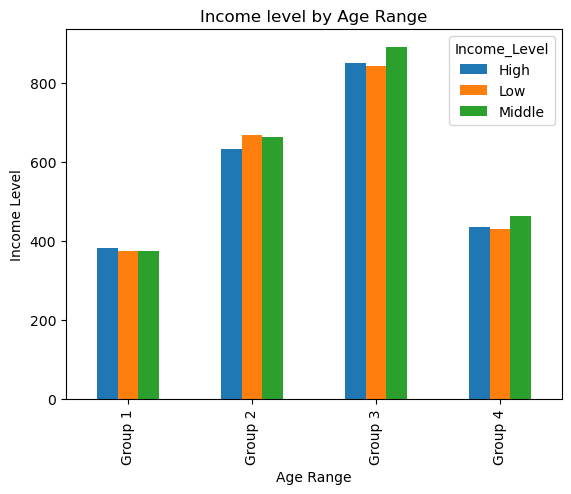

In [192]:
GXI_Summary.plot(
    kind = "bar",
    title= "Income level by Age Range",
    ylabel= "Income Level",
    xlabel= "Age Range",
)

plt.show()
# Now we do know the distribution for age and income level, but we are leaving the location behind.

In [180]:
Group_X_Location = Demographic_Data.groupby(["Age_Range","Location"]).count().reset_index()
Group_X_Location

,Age_Range,Location,Age,Income_Level
0,Group 1,Rural,376,376
1,Group 1,Suburban,357,357
2,Group 1,Urban,396,396
3,Group 2,Rural,676,676
4,Group 2,Suburban,627,627
5,Group 2,Urban,659,659
6,Group 3,Rural,807,807
7,Group 3,Suburban,886,886
8,Group 3,Urban,888,888
9,Group 4,Rural,453,453


In [185]:
# lets do the same exercise to find out where they live.

GXL_Summary = Group_X_Location.pivot(
    index = "Age_Range",
    columns = "Location",
    values = "Age"
)
GXL_Summary

Location,Rural,Suburban,Urban
Age_Range,,,
Group 1,376,357,396
Group 2,676,627,659
Group 3,807,886,888
Group 4,453,450,425


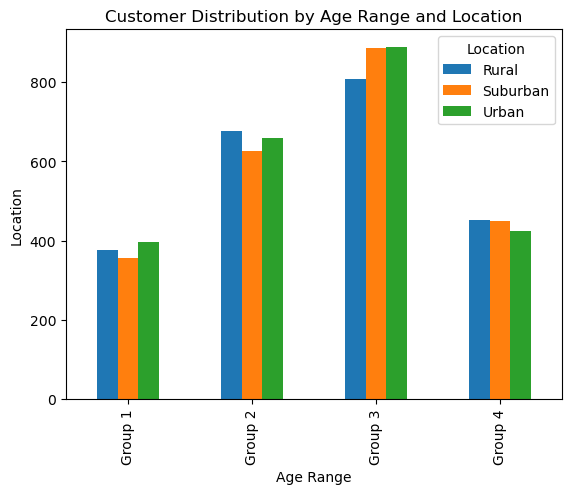

In [189]:
GXL_Summary.plot(
    kind = "bar",
    title= "Customer Distribution by Age Range and Location",
    ylabel= "Location",
    xlabel= "Age Range",
)

plt.show()

In [164]:
# We have seen in all data that groups 1 and 4 are the lower tier, but together they are a big portion of customers, so it is good to keep them
# in mind to prevent byas.
aggregation1 = Age_below_25.count() + Age_above_60.count()
aggregation1 = aggregation1["Age"] / Demographic_Data.count() * 100
aggregation1 = aggregation1["Age"]

# With this we can see that it is 33.1 of customers, a significant loss if they started to use services less. We will do the same with the others
aggregation2 = Age_between_25_and_40.count() / Demographic_Data.count() * 100
aggregation2 = aggregation2["Age"]

aggregation3 = Age_between_40_and_60.count() / Demographic_Data.count() * 100
aggregation3 = aggregation3["Age"]

print(f'Customers in group 2 respresent {aggregation2} of the total customers, while group 3 {aggregation3}, and groups 1 and 4 are {aggregation1}')

Customers in group 2 respresent 28.028571428571432 of the total customers, while group 3 36.871428571428574, and groups 1 and 4 are 35.099999999999994


### Now we can anwer whos is my tipical customer, not only as global but also as grouped demographics.

#### 1. The majority of customers are in the age range between 40 and 60 years old (36.88%). The second group is a range between 25 and 40 years old (28.1%)
#### 2. While group 1 and 4 are almost half of the major group, together they represent a good portion of the market. ( 35.1 %) of total customers.
#### 3. The remaining 55.9% of customers are people between the age of 25 and 60 years. Whose income is evenly distributed between low and high. So the user adoption insn't focalized on a particular. income level.
#### 4. The location is also evenly distributed across the age groups, we are not offering services to a particular location area.

#### Customer proofiling:
##### Customers are in average 42 yers old, all of them are equally dsitributed between low medium and high income and they are also located in Rural, Suburban, and Urban areas.

##### Group 1: Average age: 20
##### Group 2: Average age: 32
##### Group 3: Average age: 49
##### Group 4: Average age: 64

### Business recommendations

#### 1. Segmentate the business in two categories, one to cover groups 2 and 3 and one to cover groups 1 and 4. The one focused on groups 2 and 3 should be bigger with more resources to expand the market in what is already the core income for the company. But groups 1 and 4 shouldn't be forgotten as those represent a big part of the businees. 
#### 2. As customers are equally dsitributed in al location areas, we do not present restrictions for growth. Scope can be widely adopted.

## Transactional analysis
#### Demographical data is just part of the story, now we must move to transacational trends to see what are they doing with the services.
#### We need to answer: How do they spend? Is it distributed or do we have top tiers? 

In [165]:
# With transactional data we have a challenge, as we don;t have distributions for customers. 
# All we have are 7000 records and those are taken as 7000 different customers.
# This means that we can't identify spend groups or usage tracking. 
# So we will use standard analysis as this data is useful fro global insights

Transaction_Trends.describe()

,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent
count,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06
std,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06
min,1.000000,10.185827,31.857484,4.617966,1.498144e+03
25%,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06
50%,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06
75%,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06
max,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07


In [166]:
Total_Average_spend = int(Transaction_Trends["Avg_Transaction_Value"].sum())
Mean_Average_spend = int(Transaction_Trends["Avg_Transaction_Value"].mean())
Min_Average_spend = int(Transaction_Trends["Avg_Transaction_Value"].min())
q_Average_spend = Transaction_Trends["Avg_Transaction_Value"].quantile([0.25,0.5,0.75])
Max_Average_spend = int(Transaction_Trends["Avg_Transaction_Value"].max())
q3 = Transaction_Trends["Avg_Transaction_Value"].quantile(0.75)
print(f'The average spend is distributed as Total {Total_Average_spend}, Average {Mean_Average_spend}, Minimun {Min_Average_spend} and max {Max_Average_spend}')
print(f'The quatiles dsitribution is {q_Average_spend}')

# Now we can extract those to use them for insights and grpahs. 


The average spend is distributed as Total 69627820, Average 9946, Minimun 10 and max 19996
The quatiles dsitribution is 0.25     4907.466790
0.50     9841.172643
0.75    14955.048801
Name: Avg_Transaction_Value, dtype: float64


In [167]:
# We want to check customers that spend more than average, we will use the mean already extracted and compare

above_avg_spenders = Transaction_Trends[Transaction_Trends["Avg_Transaction_Value"] >= Mean_Average_spend]
above_avg_spender_Count = above_avg_spenders["Customer_ID"].count()
below_avg_spenders = Transaction_Trends[Transaction_Trends["Avg_Transaction_Value"] <= Mean_Average_spend]
below_avg_spender_Count = below_avg_spenders["Customer_ID"].count()

In [168]:
percent_above = above_avg_spender_Count/7000 * 100
percent_above

np.float64(49.528571428571425)

In [195]:
#Now we will compere average spenders in a pie chart
values = [above_avg_spender_Count, below_avg_spender_Count]
label = ["above_avg_spender_Count", "below_avg_spender_Count"]  

pie, ax = plt.subplots()

ax.pie(
    values,
    labels=label
)
ax.set_title("Spenders")



Text(0.5, 1.0, 'Spenders')

##### Now we have enought to answer the initial questions:

##### The average spend is distributed as Total 69627820, Average 9946, Minimun 10 and max 19996
##### The quatiles Distribution is 
##### - 0.25     4907.466790
##### - 0.50     9841.172643
##### - 0.75    14955.048801
##### 49% of customers spend above the average, wich means that there is a healthy customer base spend.

### Business recommendation
##### There is no need to segmentate the services yet as the income is equally distributed in spend, as we saw with demographics we could prioritize adoption over spend amount.